# OFFRE DE VACCINATION COVAX DANS LA VILLE D'ABIDJAN



Nous avons étudié l'offre de vaccination dans la ville d'Abidjan.
Le fichier utilisé est issu du site ...
La liste des district sanitaire d'Abidjan a été tiré du document... téléchargé sur le site...

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sites_covid_abidjan = pd.read_csv("sites-de-vaccination-de-covid-19-dans-le-district-d'abidjan.csv")

In [3]:
sites_covid_abidjan.head(6)

,District sanitaire,Sites de vaccination,Point GPS,Téléphone,Email,Jours d'ouverture,Horaires,Image,Infos utiles
0,Cocody,Centre Hospitalier Universitaire (CHU) de Cocody,"5.3420,-3.9936",27 22 48 10 00,NaN,Lundi-Dimanche,24H/24,http://www.atoo.ci/wp-content/uploads/2019/10/...,"Le Centre hospitalier universitaire de Cocody,..."
1,Cocody,Centre Hospitalier Universitaire (CHU) d'Angré,"5.40100,-3.95744",27 22 49 64 00,info@chuangre.ci,Lundi-Dimanche,24H/24,http://chuangre.ci/images/chu/photo-chu.jpg,"Le 5ème établissement sanitaire du pays, le CH..."
2,Bingerville,Hôpital Général (HG) de Bingerville,"5.36004,-3.88532",27 22 40 30 06,NaN,Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,L'hôpital général de Bingerville est situé à B...
3,Cocody,Lycée Classique de Cocody,"5.33224,-4.00606",27 22 44 35 17,NaN,Lundi-Vendredi,7H30–16H,https://data354-public-assets.s3.eu-west-3.ama...,Le lycée classique d’Abidjan est un établissem...
4,Bingerville,Service de Santé Scolaire et Universitaire (SS...,"5.359301,-3.8845162",27 22 40 30 02,NaN,Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,"Le SSU de Bingerville, anciennement appelé méd..."
5,Cocody,Dispensaire urbain de Cocody (Siège du District),"5.338866763952778, -4.004632635601998",27 22 48 53 63 - 07 07 90 07 44,NaN,Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,Le dispensaire urbain de Cocody est un établis...


In [4]:
sites_covid_abidjan.shape

(59, 9)

In [5]:
sites_covid_abidjan['District sanitaire'].unique()

array(['Cocody', 'Bingerville', 'Port-Bouët', 'Yopougon Ouest',
       'Yopougon Est', 'Attecoube', 'Adjame', 'Plateau', 'Anyama',
       'Treichville', 'Marcory', 'Abobo Est', 'Abobo Ouest', 'Koumassi',
       'DS Treichville Marcory', 'DS Abobo Est', 'DS Koumassi', 'DS APA',
       'DS Yopougon Est', 'DS Port Bouet -Vidri', 'Cocody Bingerville',
       'APA', 'Plateau face à la Tour E'], dtype=object)

In [6]:
sites_covid_abidjan['District sanitaire'] = sites_covid_abidjan['District sanitaire'].replace({
    "Cocody" : "DS COCODY BINGERVILLE",
    "Bingerville" : "DS COCODY BINGERVILLE",
    "Port-Bouët" : "DS KOUMASSI P. BOUET VRIDI",
    "Yopougon Ouest" : "DS YOPOUGON OUEST",
    "Yopougon Est" : "DS YOPOUGON EST",
    "Attecoube" : "DS APA",
    "Adjame" : "DS APA",
    "Plateau" : "DS APA",
    "Anyama" : "DS Anyama",
    "Treichville" : "DS TREICHVILLE MARCORY",
    "Marcory" : "DS TREICHVILLE MARCORY",
    "Abobo Est" : "DS ABOBO EST",
    "Abobo Ouest" : "DS ABOBO OUEST",
    "Koumassi" : "DS KOUMASSI P. BOUET VRIDI",
    "DS Treichville Marcory" : "DS TREICHVILLE MARCORY",
    "DS Abobo Est" : "DS ABOBO EST",
    "DS Koumassi" : "DS KOUMASSI P. BOUET VRIDI",
    "DS Yopougon Est" : "DS YOPOUGON EST",
    "DS Port Bouet -Vidri" : "DS KOUMASSI P. BOUET VRIDI",
    "Cocody Bingerville" : "DS COCODY BINGERVILLE",
    "APA" : "DS APA",
    "Plateau face à la Tour E" : "DS APA",
    "Anyama" : "DS ANYAMA"
    
})

In [7]:
sites_covid_abidjan.dtypes

District sanitaire      object
Sites de vaccination    object
Point GPS               object
Téléphone               object
Email                   object
Jours d'ouverture       object
Horaires                object
Image                   object
Infos utiles            object
dtype: object

In [8]:
sites_covid_abidjan[['latitude', 'longitude']] = sites_covid_abidjan['Point GPS'].str.split(',', 1, expand=True)

In [9]:
sites_covid_abidjan.columns

Index(['District sanitaire', 'Sites de vaccination', 'Point GPS', 'Téléphone',
       'Email', 'Jours d'ouverture', 'Horaires', 'Image', 'Infos utiles',
       'latitude', 'longitude'],
      dtype='object')

In [10]:
sites_covid_abidjan[['longitude', 'latitude']]

,longitude,latitude
0,-3.9936,5.3420
1,-3.95744,5.40100
2,-3.88532,5.36004
3,-4.00606,5.33224
4,-3.8845162,5.359301
5,-4.004632635601998,5.338866763952778
6,-3.96218,5.26256
7,-3.89594,5.24064
8,-3.896186067214964,5.240251461669845
9,-3.890665778768541,5.240571840053876


#### Les sites de vaccination qui ne sont pas géolocalisés

In [11]:
sites_covid_abidjan[sites_covid_abidjan['Point GPS'].isna()]

,District sanitaire,Sites de vaccination,Point GPS,Téléphone,Email,Jours d'ouverture,Horaires,Image,Infos utiles,latitude,longitude
22,DS ANYAMA,SSU Anyanan Lycée 1,NaN,NaN,NaN,Lundi-Vendredi,7H30-17H,https://data354-public-assets.s3.eu-west-3.ama...,NaN,NaN,NaN
23,DS ANYAMA,Centre de Santé Urbain (CSU) d'Attinguié,NaN,NaN,NaN,Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,Les centres de santé urbains sont des structur...,NaN,NaN
25,DS ANYAMA,Centre de Santé Urbain (CSU) de Cissé,NaN,NaN,NaN,Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,Les centres de santé urbains sont des structur...,NaN,NaN
26,DS ANYAMA,Dispensaire Urbain,NaN,NaN,NaN,Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,Les dispensaires urbains sont des structures s...,NaN,NaN
28,DS ANYAMA,Centre de Santé Urbain (CSU) d'Anyaman Debarca...,NaN,NaN,NaN,Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,Les centres de santé urbains sont des structur...,NaN,NaN


In [12]:
sites_covid_abidjan["Jours d'ouverture"].value_counts()

Lundi-Dimanche    48
Lundi-Vendredi     9
Lundi-Samedi       2
Name: Jours d'ouverture, dtype: int64

In [13]:
sites_covid_abidjan["Horaires"].value_counts()

24H/24        47
7H30-17H       4
7H30-14H30     2
7H30–16H       1
8H–17H         1
24h/24         1
6H30-21H       1
7H30-16H30     1
7H30-18H30     1
Name: Horaires, dtype: int64

In [14]:
sites_covid_abidjan['District sanitaire'].value_counts()

DS APA                        10
DS KOUMASSI P. BOUET VRIDI     9
DS ANYAMA                      9
DS COCODY BINGERVILLE          8
DS TREICHVILLE MARCORY         7
DS ABOBO EST                   5
DS YOPOUGON EST                4
DS ABOBO OUEST                 4
DS YOPOUGON OUEST              3
Name: District sanitaire, dtype: int64

#### Les sites de vaccination géolocalisés

In [15]:
sites_covid_abidjan = sites_covid_abidjan[~sites_covid_abidjan['Point GPS'].isna()]

In [16]:
sites_covid_abidjan.shape

(54, 11)

In [17]:
sites_covid_abidjan['longitude'] = pd.to_numeric(sites_covid_abidjan['longitude'])

In [18]:
sites_covid_abidjan['latitude'] = pd.to_numeric(sites_covid_abidjan['latitude'])

In [19]:
sites_covid_abidjan.columns

Index(['District sanitaire', 'Sites de vaccination', 'Point GPS', 'Téléphone',
       'Email', 'Jours d'ouverture', 'Horaires', 'Image', 'Infos utiles',
       'latitude', 'longitude'],
      dtype='object')

In [20]:
sites_covid_abidjan.dtypes

District sanitaire       object
Sites de vaccination     object
Point GPS                object
Téléphone                object
Email                    object
Jours d'ouverture        object
Horaires                 object
Image                    object
Infos utiles             object
latitude                float64
longitude               float64
dtype: object

In [21]:
sites_covid_abidjan.Image[0]

'http://www.atoo.ci/wp-content/uploads/2019/10/CHU_de_Cocody.jpg'

In [22]:
sites_covid_abidjan_gdf = gpd.GeoDataFrame(sites_covid_abidjan, crs="EPSG:4326" , geometry=gpd.points_from_xy(sites_covid_abidjan.longitude, sites_covid_abidjan.latitude))

In [23]:
sites_covid_abidjan_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
sites_covid_abidjan_gdf.explore(column="District sanitaire")

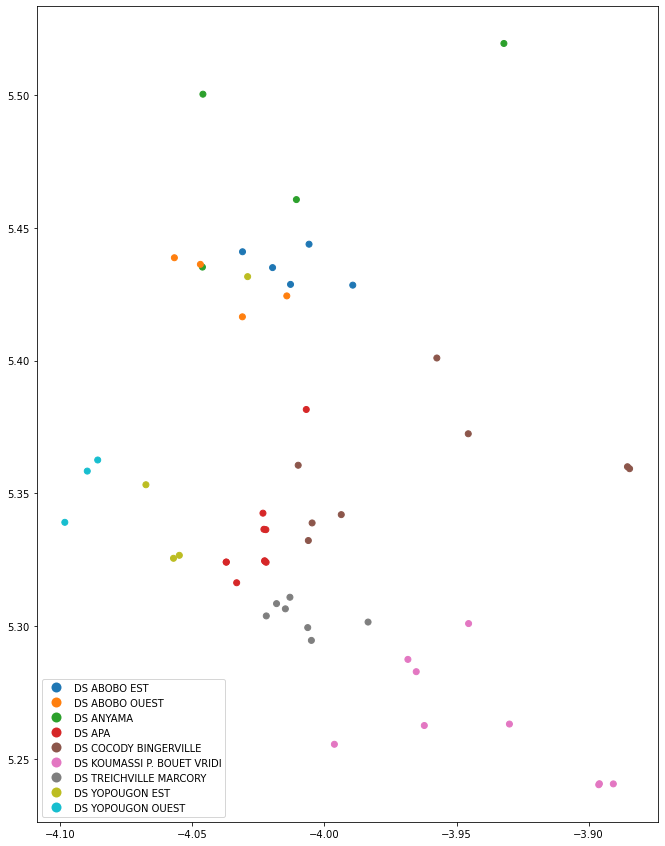

In [25]:
sites_covid_abidjan_gdf.plot(column="District sanitaire", figsize=(15,15), legend=True)
plt.show()

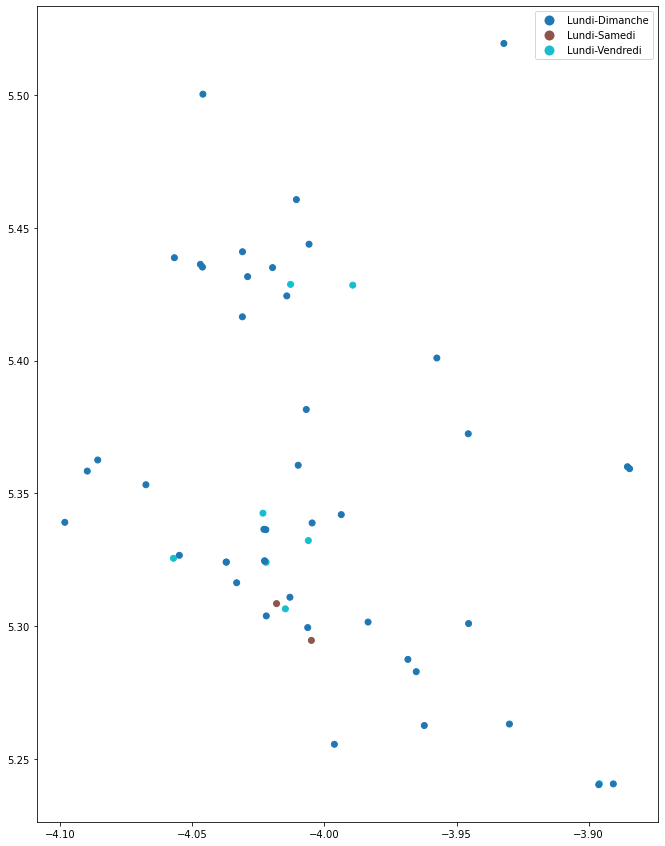

In [26]:
sites_covid_abidjan_gdf.plot(column="Jours d'ouverture", figsize=(15,15), legend=True)
plt.show()

In [27]:
sites_covid_abidjan_gdf.head()

,District sanitaire,Sites de vaccination,Point GPS,Téléphone,Email,Jours d'ouverture,Horaires,Image,Infos utiles,latitude,longitude,geometry
0,DS COCODY BINGERVILLE,Centre Hospitalier Universitaire (CHU) de Cocody,"5.3420,-3.9936",27 22 48 10 00,NaN,Lundi-Dimanche,24H/24,http://www.atoo.ci/wp-content/uploads/2019/10/...,"Le Centre hospitalier universitaire de Cocody,...",5.342000,-3.993600,POINT (-3.99360 5.34200)
1,DS COCODY BINGERVILLE,Centre Hospitalier Universitaire (CHU) d'Angré,"5.40100,-3.95744",27 22 49 64 00,info@chuangre.ci,Lundi-Dimanche,24H/24,http://chuangre.ci/images/chu/photo-chu.jpg,"Le 5ème établissement sanitaire du pays, le CH...",5.401000,-3.957440,POINT (-3.95744 5.40100)
2,DS COCODY BINGERVILLE,Hôpital Général (HG) de Bingerville,"5.36004,-3.88532",27 22 40 30 06,NaN,Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,L'hôpital général de Bingerville est situé à B...,5.360040,-3.885320,POINT (-3.88532 5.36004)
3,DS COCODY BINGERVILLE,Lycée Classique de Cocody,"5.33224,-4.00606",27 22 44 35 17,NaN,Lundi-Vendredi,7H30–16H,https://data354-public-assets.s3.eu-west-3.ama...,Le lycée classique d’Abidjan est un établissem...,5.332240,-4.006060,POINT (-4.00606 5.33224)
4,DS COCODY BINGERVILLE,Service de Santé Scolaire et Universitaire (SS...,"5.359301,-3.8845162",27 22 40 30 02,NaN,Lundi-Dimanche,24H/24,https://data354-public-assets.s3.eu-west-3.ama...,"Le SSU de Bingerville, anciennement appelé méd...",5.359301,-3.884516,POINT (-3.88452 5.35930)


In [28]:
import folium

In [29]:
abidjan_location = [5.316667, -4.033333]

In [30]:
abidjan_map = folium.Map(location=abidjan_location, zoom_start=12)
folium.GeoJson(sites_covid_abidjan_gdf.geometry).add_to(abidjan_map)

for row in sites_covid_abidjan_gdf.iterrows():
    row_values = row[1] 
    location = [row_values['latitude'], row_values['longitude']]
    popup =  str(row_values['District sanitaire']) + ' ' + str(row_values['Sites de vaccination'])
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(abidjan_map)
display(abidjan_map)

In [31]:
folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
).add_to(abidjan_map)
for row in sites_covid_abidjan_gdf.iterrows():
    row_values = row[1] 
    location = [row_values['latitude'], row_values['longitude']]
    popup =  str(row_values['District sanitaire']) + ' ' + str(row_values['Sites de vaccination'])
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(abidjan_map)
display(abidjan_map)

In [32]:
#### zone tampon

In [33]:
sites_covid_abidjan_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
sites_covid_abidjan_gdf_utm_2043 = sites_covid_abidjan_gdf.to_crs(epsg=2043)

In [35]:
sites_covid_abidjan_gdf_utm_2043_buffered_1_km = sites_covid_abidjan_gdf_utm_2043.copy()

In [36]:
sites_covid_abidjan_gdf_utm_2043_buffered_1_km['geometry'] = sites_covid_abidjan_gdf_utm_2043_buffered_1_km.apply(lambda row:row.geometry.buffer(1000),axis=1)

In [37]:
abidjan_location

[5.316667, -4.033333]

In [38]:
abidjan_map_1 = folium.Map(location=abidjan_location, zoom_start=12)
folium.GeoJson(sites_covid_abidjan_gdf_utm_2043.geometry).add_to(abidjan_map_1)
folium.GeoJson(sites_covid_abidjan_gdf_utm_2043_buffered_1_km.geometry).add_to(abidjan_map_1)


for row in sites_covid_abidjan_gdf_utm_2043.iterrows():
    row_values = row[1] 
    location = [row_values['latitude'], row_values['longitude']]
    popup =  str(row_values['District sanitaire']) + '\n' + str(row_values['Sites de vaccination'])
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(abidjan_map_1)
display(abidjan_map_1)

In [39]:
sites_covid_abidjan_gdf_utm_2043_buffered_3_km = sites_covid_abidjan_gdf_utm_2043.copy()

In [40]:
sites_covid_abidjan_gdf_utm_2043_buffered_3_km['geometry'] = sites_covid_abidjan_gdf_utm_2043_buffered_3_km.apply(lambda row:row.geometry.buffer(3000),axis=1)

In [41]:
abidjan_map_2 = folium.Map(location=abidjan_location, zoom_start=12)
folium.GeoJson(sites_covid_abidjan_gdf_utm_2043.geometry).add_to(abidjan_map_2)
folium.GeoJson(sites_covid_abidjan_gdf_utm_2043_buffered_3_km.geometry).add_to(abidjan_map_2)


for row in sites_covid_abidjan_gdf_utm_2043.iterrows():
    row_values = row[1] 
    location = [row_values['latitude'], row_values['longitude']]
    popup =  str(row_values['District sanitaire']) + '\n' + str(row_values['Sites de vaccination'])
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(abidjan_map_2)
display(abidjan_map_2)

In [42]:
sites_covid_abidjan_gdf_utm_2043_buffered_5_km = sites_covid_abidjan_gdf_utm_2043.copy()

In [43]:
sites_covid_abidjan_gdf_utm_2043_buffered_5_km['geometry'] = sites_covid_abidjan_gdf_utm_2043_buffered_5_km.apply(lambda row:row.geometry.buffer(5000),axis=1)

In [44]:
abidjan_map_3 = folium.Map(location=abidjan_location, zoom_start=12)
folium.GeoJson(sites_covid_abidjan_gdf_utm_2043.geometry).add_to(abidjan_map_3)
folium.GeoJson(sites_covid_abidjan_gdf_utm_2043_buffered_5_km.geometry).add_to(abidjan_map_3)


for row in sites_covid_abidjan_gdf_utm_2043.iterrows():
    row_values = row[1] 
    location = [row_values['latitude'], row_values['longitude']]
    popup =  str(row_values['District sanitaire']) + '\n' + str(row_values['Sites de vaccination'])
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(abidjan_map_3)
display(abidjan_map_3)